In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

import pickle 


In [38]:
# Read Data
df = pd.read_csv("../datasets/original/heart.csv")

In [39]:
# First 15 rows of our data
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Data Exploration

In [40]:
#Size of the dataset
df.shape

(1025, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


+ Out of 14 features, we have 13 int type and only one with float data type.
+ We have no missing values in our dataset.

In [42]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

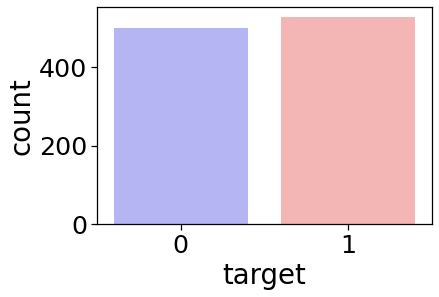

In [43]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [44]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


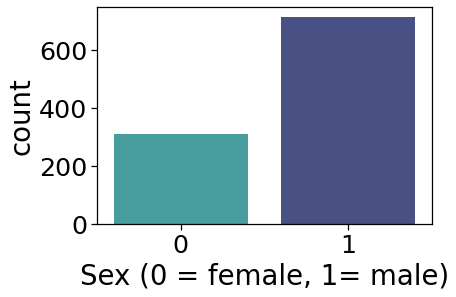

In [45]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [46]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [47]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


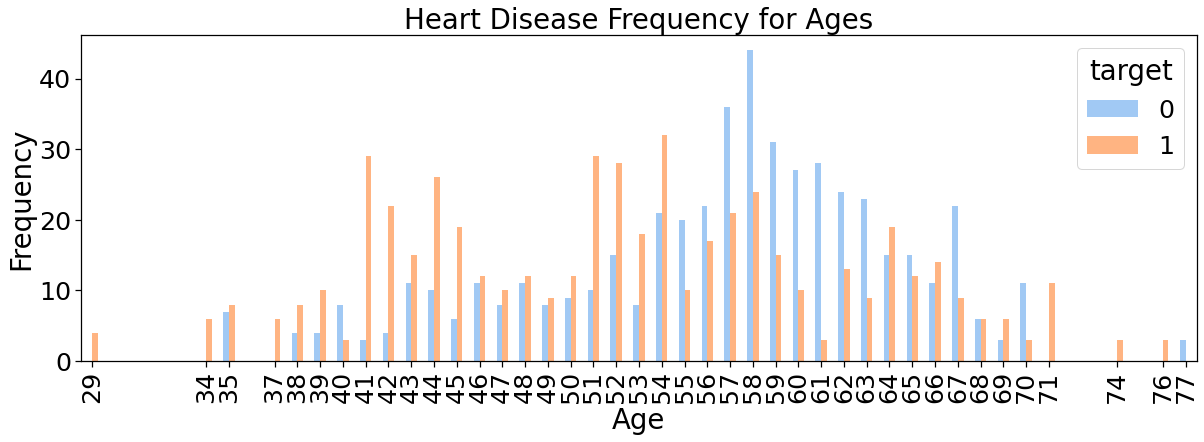

In [48]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

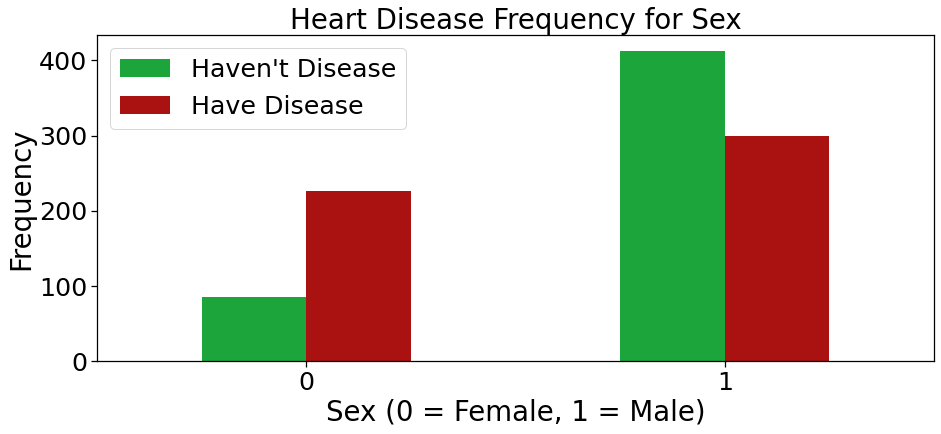

In [49]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [50]:
# Divide the Age feature into three parts - "Young", "Middle" and "Elder"
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

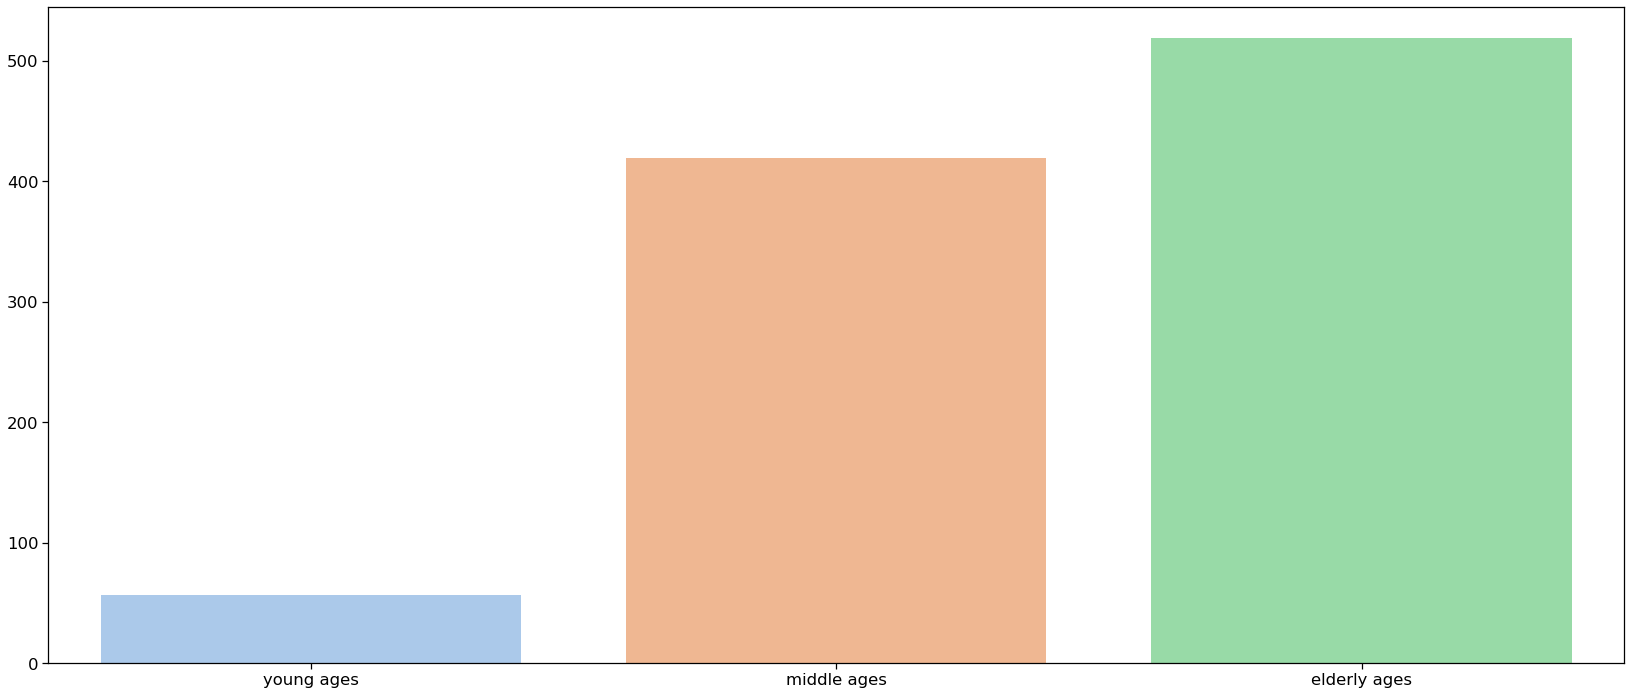

In [51]:
# Divide the Age feature using Bar Chart
plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

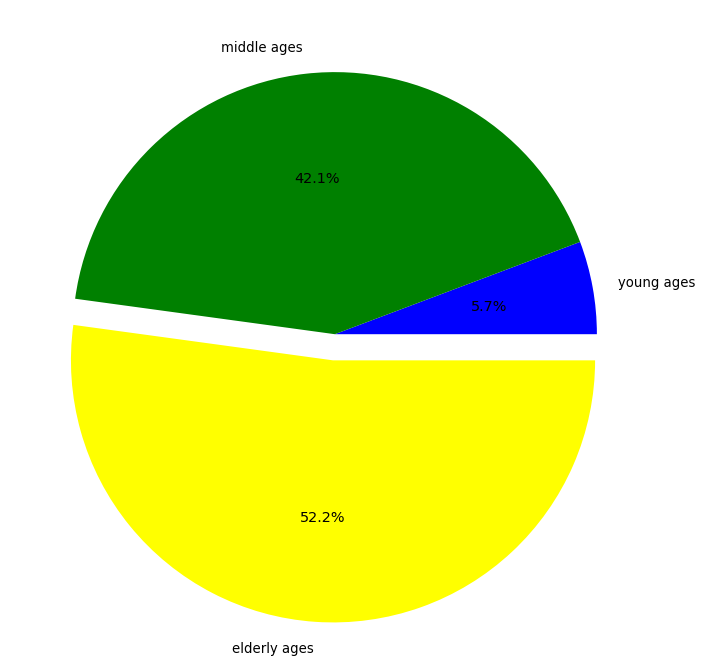

In [52]:
# Divide the Age feature using Pie Chart
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

+ A large proportion of dataset contains Elder people.
+ Elderly people are more likely to suffer from heart disease.

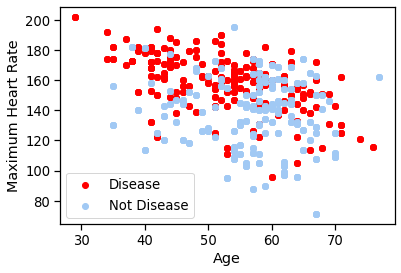

In [53]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

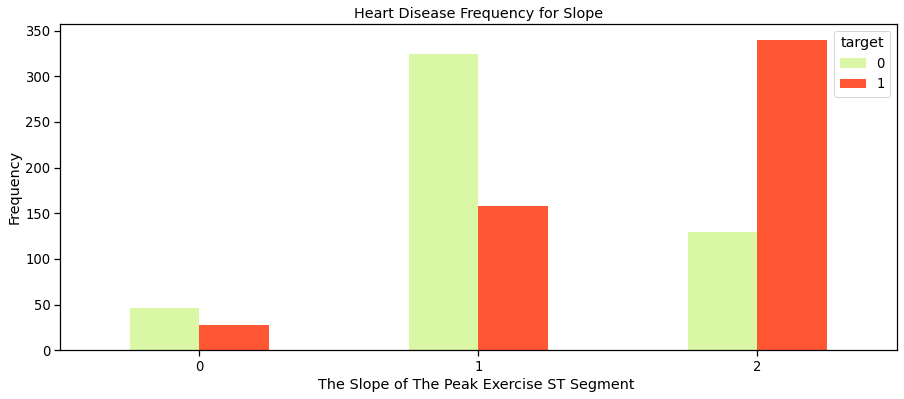

In [54]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

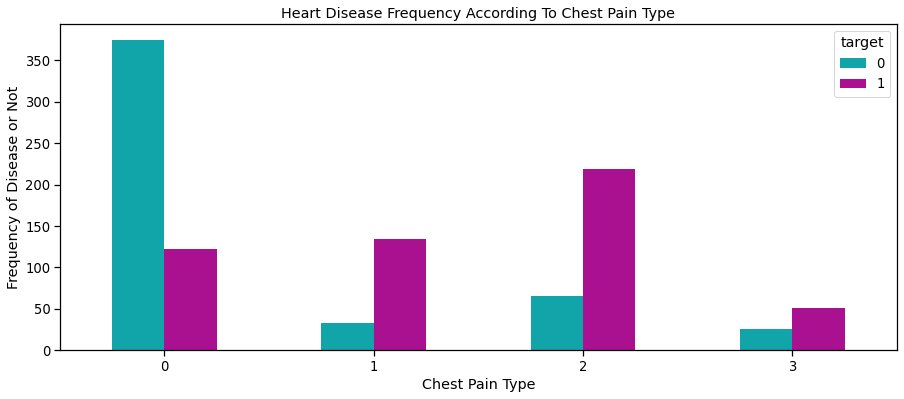

In [55]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

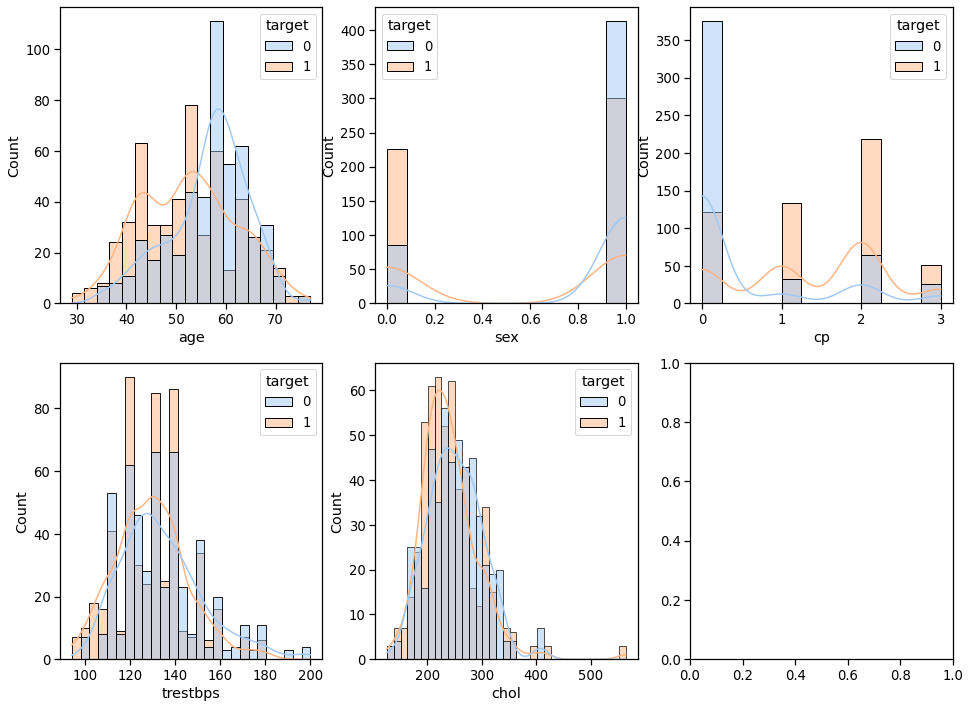

In [56]:
feature_cols = df.columns
sns.set_palette("pastel")
fig, axs = plt.subplots(2, 3, figsize = (16, 12))
i = 0
for row in range(2):
    for col in range(3):
        if i <= 4:
            ax = axs[row, col]
            sns.histplot(data=df, x = feature_cols[i], hue = 'target', kde = True, ax = ax, color = "Red")
            i += 1
        else:
            break
    
plt.show()

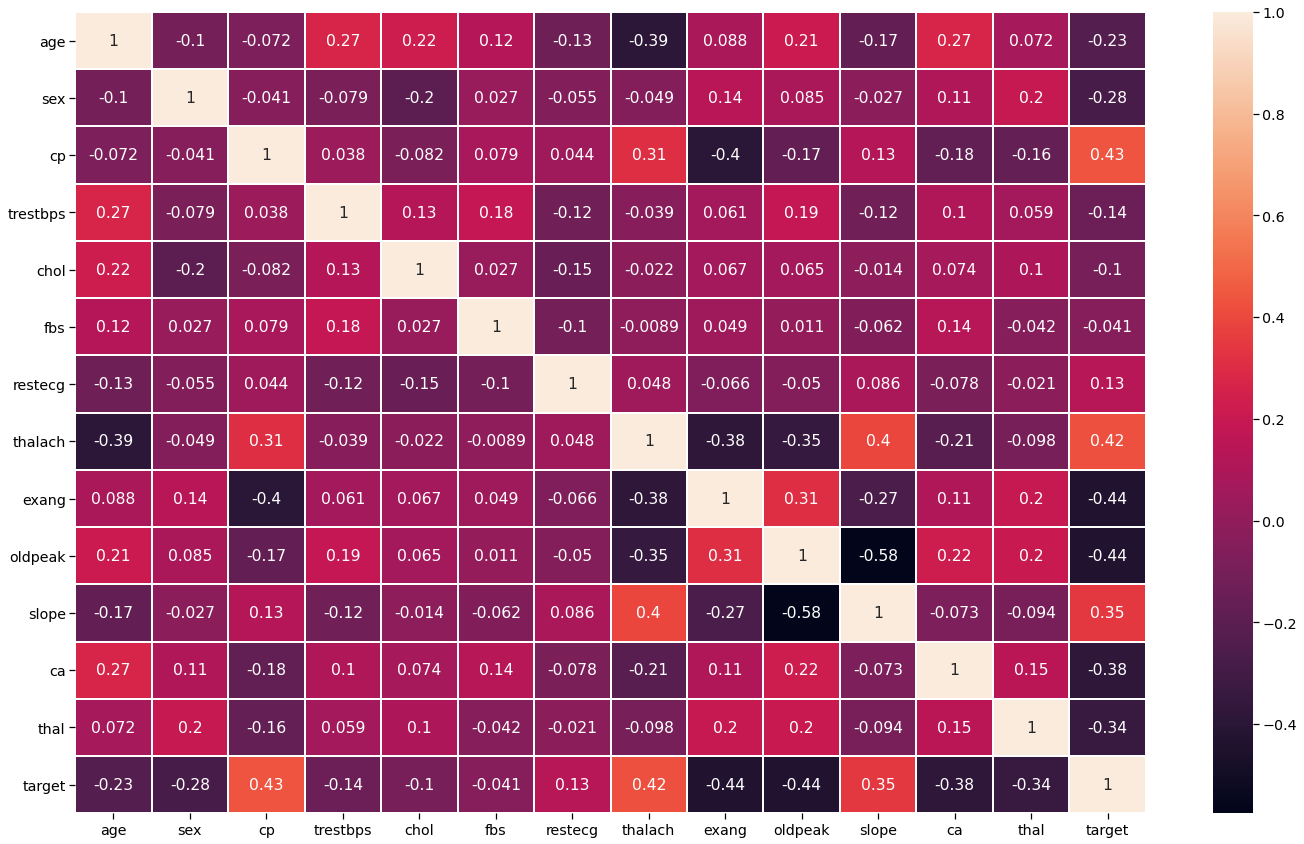

In [57]:
# Check correleation between various features.
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

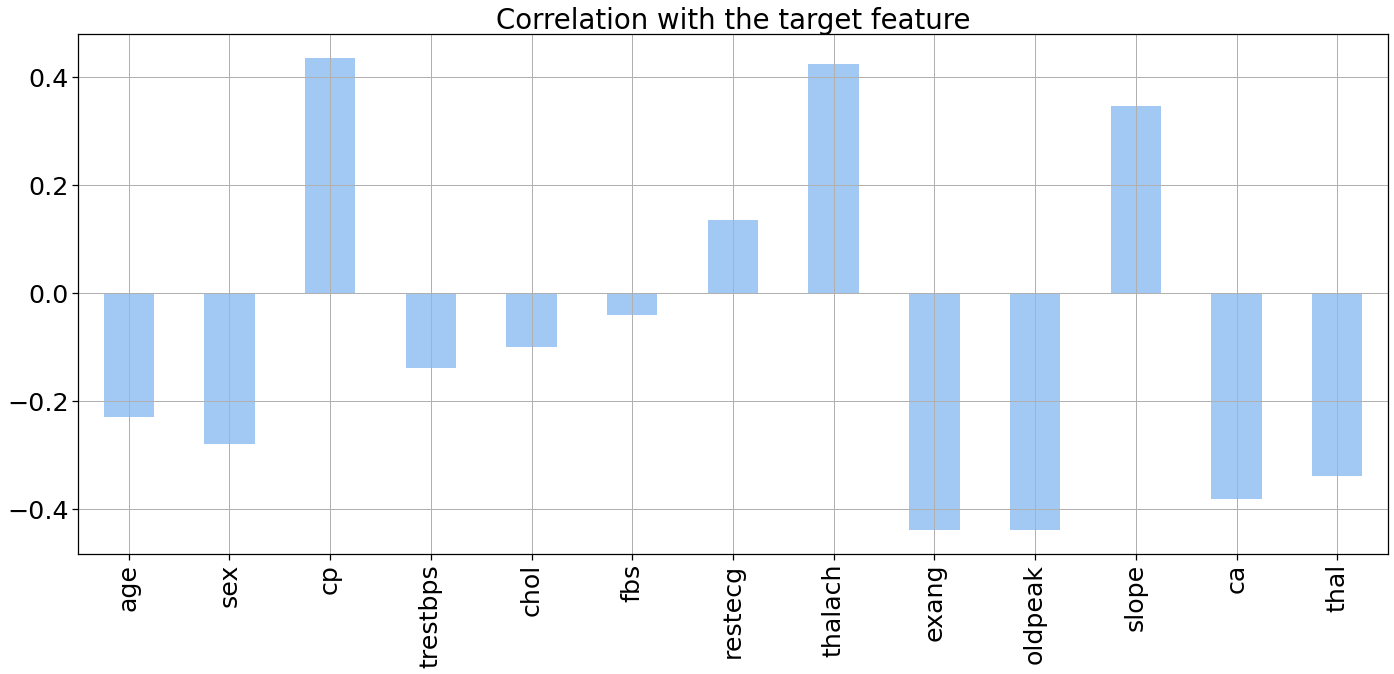

In [58]:
# Check the correlation of various features with the target feature.
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.tight_layout()

+ Four feature( "cp", "restecg", "thalach", "slope" ) are positively correlated with the target feature.
+ Other features are negatively correlated with the target feature.

# Creating Model

In [59]:
y = df.target.values
X = df.drop(['target'], axis = 1)

In [60]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [61]:
X_data, y_data = X, y
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=24)

In [75]:
X_train

array([[ 0.49182865,  0.63820324, -0.91656533, ..., -2.24760314,
        -0.73897289,  1.05754113],
       [ 0.27328661,  0.63820324,  1.02919412, ...,  0.96509065,
         0.22016032,  1.05754113],
       [-0.71015259, -1.56689898,  1.02919412, ...,  0.96509065,
        -0.73897289, -0.58788777],
       ...,
       [-0.38233953,  0.63820324, -0.91656533, ...,  0.96509065,
        -0.73897289,  1.05754113],
       [-0.60088157, -1.56689898, -0.91656533, ...,  0.96509065,
        -0.73897289, -0.58788777],
       [ 0.81964172, -1.56689898,  1.02919412, ..., -0.64125625,
         0.22016032,  1.05754113]])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[-0.60088157  0.63820324  1.02919412 ...  0.96509065  2.13842675
  -0.58788777]
 [ 1.36599683  0.63820324 -0.91656533 ... -0.64125625  1.17929353
   1.05754113]
 [-0.49161055  0.63820324  1.02919412 ... -0.64125625  0.22016032
   1.05754113]
 ...
 [ 0.60109968 -1.56689898  2.00207385 ...  0.96509065 -0.73897289
  -0.58788777]
 [-1.36577873  0.63820324  1.02919412 ...  0.96509065 -0.73897289
  -0.58788777]
 [ 0.49182865  0.63820324  1.02919412 ...  0.96509065 -0.73897289
  -0.58788777]]


In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"Accuracy Logistic Regression : {lr_acc_score*100}%")

Accuracy Logistic Regression : 83.44155844155844%


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print(f"Accuracy Random Forest Classifier : {rf_acc_score*100}%")

Accuracy Random Forest Classifier : 97.07792207792207%


In [65]:
# Hyperparameter Optimization
from sklearn.neighbors import KNeighborsClassifier
test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

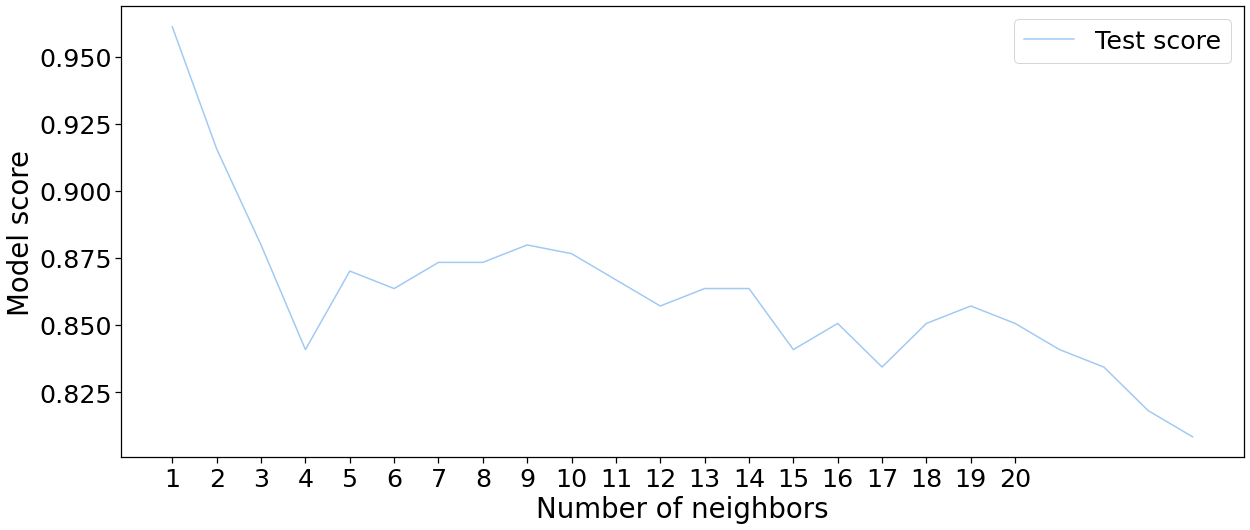

In [66]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

In [67]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(f"Accuracy K-Neighbors Classifier : {knn_acc_score*100}%")

Accuracy K-Neighbors Classifier : 87.66233766233766%


+ At K=1, we are getting highest test accuracy.

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(f"Accuracy Decision Tree Classifier : {dt_acc_score*100}%")

Accuracy Decision Tree Classifier : 91.88311688311688%


# Evaluation

In [69]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K Neighbour','Decision Tree'], 'Accuracy': [lr_acc_score*100
                   ,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.441558
1,Random Forest,97.077922
2,K Neighbour,87.662338
3,Decision Tree,91.883117


+ From the above models Random Forest is giving us the best accuracy which is 96%.

In [70]:
pickle.dump(rf, open('../models/model.pkl', 'wb'))
